In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow_hub

In [ ]:
import numpy as np
import cv2
import PIL.Image as Image
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential




In [ ]:
image_shape = (224,224)
classifier = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape = image_shape+(3,))])

In [ ]:
# model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4?tf-hub-format=compressed"
# data_dir = tf.keras.utils.get_file('mobileNet_V2', origin=model_url,  cache_dir='/content/drive/MyDrive/Models_1', untar=True)

In [ ]:
# Removing unnecessary folder
# import shutil
# directory = '/content/drive/MyDrive/Models_1/datasets'
# shutil.rmtree(directory)

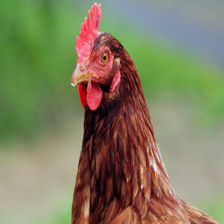

In [ ]:
img = Image.open('/content/drive/MyDrive/Models_1/01HorizontalHero-21072062019c483eb1e62c8c17a59a16.jpg').resize(image_shape)
img

In [ ]:
img = np.array(img)/255
img.shape


(224, 224, 3)

In [ ]:
img[np.newaxis, ...].shape

(1, 224, 224, 3)

In [ ]:
test_result = classifier.predict(img[np.newaxis, ...])
test_result.shape

1/1 [==============================] - 1s 1s/step


(1, 1001)

In [ ]:
highest_probability_index = np.argmax(test_result)
highest_probability_index

9

In [ ]:
image_labels=[]
with open('/content/drive/MyDrive/Models_1/ImageNetLabels.txt', 'r') as f:
  image_labels = f.read().splitlines()

In [ ]:
image_labels[highest_probability_index]

'hen'

# **----------Flowers Dataset---------- **

In [ ]:
flowers_ds_dir = "/content/drive/MyDrive/DataSets/datasets/flower_photos"


In [ ]:
import pathlib
flowers_ds_dir = pathlib.Path(flowers_ds_dir)
flowers_ds_dir

PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos')

In [ ]:
list(flowers_ds_dir.glob('*/*.jpg'))[:10]

[PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/sunflowers/3749091071_c146b33c74_n.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/sunflowers/16616096711_12375a0260_n.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/sunflowers/20406385204_469f6749e2_n.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/sunflowers/7820305664_82148f3bfb_n.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/sunflowers/15030133005_9728102622_z.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/sunflowers/20410697750_c43973d1eb.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/sunflowers/20407896403_a50fef58ac_n.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/sunflowers/15026703621_e15e9d55f0_n.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/sunflowers/15191613243_82ee8e0fe8.jpg'),
 PosixPath('/con

In [ ]:
img_count = len(list(flowers_ds_dir.glob('*/*.jpg')))
img_count

3670

In [ ]:
roses = list(flowers_ds_dir.glob('roses/*'))
len(roses)

641

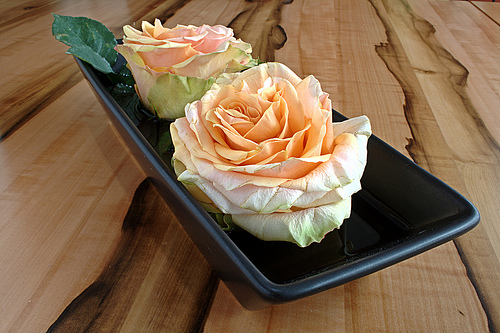

In [ ]:
Image.open(str(roses[595]))

In [ ]:
flower_img_dict = {
    'roses': list(flowers_ds_dir.glob('roses/*')),
    'daisy': list(flowers_ds_dir.glob('daisy/*')),
    'dandelion': list(flowers_ds_dir.glob('dandelion/*')),
    'sunflowers': list(flowers_ds_dir.glob('sunflowers/*')),
    'tulips': list(flowers_ds_dir.glob('tulips/*')),

}

In [ ]:
flower_img_dict['tulips']

[PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/tulips/4042180234_64cd2859c9_m.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/tulips/17165583356_38cb1f231d_n.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/tulips/7002703410_3e97b29da5_n.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/tulips/5208680166_c4372477ef_n.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/tulips/12949131454_4d3392f4dd_n.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/tulips/8562853756_73778dac25_n.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/tulips/8708856019_f3be2353a4_n.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/tulips/3150964108_24dbec4b23_m.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/flower_photos/tulips/3511776685_3635087b12_n.jpg'),
 PosixPath('/content/drive/MyDrive/DataSets/datasets/

In [ ]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion':2,
    'sunflowers':3,
    'tulips': 4,

}

In [ ]:
img = cv2.imread(str(flower_img_dict['roses'][0]))
img.shape

(322, 500, 3)

In [ ]:
cv2.resize(img, image_shape).shape

(224, 224, 3)

In [ ]:
X, Y = [], []
for flower_name, images in flower_img_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, image_shape)
    X.append(resized_img)
    Y.append(flower_labels_dict[flower_name])


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)

In [ ]:
X_train_scaled, X_test_scaled = X_train/255, X_test/255

# **Using Top layers of preTrained mobilenet model usin concepts of transfer learning and layer freezing**

In [ ]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [ ]:
#  creating layers of pretrained model without last layer and freezing these layers so they retain teir own final weights and biases.
pretrained_model_without_last_layer = hub.KerasLayer(feature_extractor, input_shape = (224,224,3), trainable = False)

In [ ]:
types_of_flowers=5
model = tf.keras.Sequential([
    pretrained_model_without_last_layer,
    tf.keras.layers.Dense(types_of_flowers)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
86/86 [==============================] - 126s 1s/step - loss: 0.7488 - accuracy: 0.7271
Epoch 2/5
86/86 [==============================] - 125s 1s/step - loss: 0.4160 - accuracy: 0.8576
Epoch 3/5
86/86 [==============================] - 128s 1s/step - loss: 0.3270 - accuracy: 0.8928
Epoch 4/5
86/86 [==============================] - 127s 1s/step - loss: 0.2757 - accuracy: 0.9139
Epoch 5/5
86/86 [==============================] - 132s 2s/step - loss: 0.2385 - accuracy: 0.9273
